In [2]:
#Activate the virtual environment
#Run in the terminal : venv/Scripts/activate
#And then run
!pip install ipykernel
!python -m ipykernel install --user --name=venv --display-name "Python (venv)"

#Install the required packages for the project
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.8 MB/s eta 0:00:00
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Installed kernelspec venv in /root/.local/share/jupyter/kernels/venv
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import MultiPolygon
from tqdm import tqdm
import gdown
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
init_notebook_mode(connected= True)
import plotly.express as px

In [4]:
import time
import statsmodels.formula.api as sm
import statsmodels

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
file_id = "1U34r_SnEZNpIPXM-_lRDjlin3vbTN_sL"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Download the file
gdown.download(url, "FD_SALAAN_2021.csv", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1U34r_SnEZNpIPXM-_lRDjlin3vbTN_sL
From (redirected): https://drive.google.com/uc?export=download&id=1U34r_SnEZNpIPXM-_lRDjlin3vbTN_sL&confirm=t&uuid=567a19e6-b0c3-4f5f-ae04-31acd37226b5
To: /content/FD_SALAAN_2021.csv
100%|██████████| 230M/230M [00:04<00:00, 48.0MB/s]


'FD_SALAAN_2021.csv'

In [7]:
base = pd.read_csv("FD_SALAAN_2021.csv", delimiter=";")

<ipython-input-7-158472014e1f>:1: DtypeWarning:

Columns (0,1,3,24) have mixed types. Specify dtype option on import or set low_memory=False.



PICO stands for
 • Population : Who are we interested in? : all French population in 2021 (all employed French population ?)
 • Intervention : What treatment/intervention do we study? : do we find a specific treatment ? related to sex/geography/PCS? determined by lasso selection ?
 • Comparison : What are we comparing it to? depends on the treatment
 •Outcome : What are we interested in? wages

### Treatment of the data

In [8]:
base.columns

Index(['A6', 'A17', 'A38', 'CPFD', 'DATDEB', 'DATFIN', 'DEPR', 'DEPT',
       'DOMEMPL', 'DOMEMPL_EM', 'DUREE', 'FILT', 'REGR', 'REGT', 'SEXE', 'PCS',
       'TYP_EMPLOI', 'CONV_COLL', 'NBHEUR', 'NBHEUR_TOT', 'AGE', 'TRNNETO',
       'TRALCHT', 'TREFF', 'CONT_TRAV', 'CS', 'AGE_TR', 'DATDEB_TR',
       'DATFIN_TR', 'DUREE_TR', 'POND'],
      dtype='object')

In [9]:
base.describe()

,DATDEB,DATFIN,DOMEMPL,DOMEMPL_EM,DUREE,FILT,REGR,REGT,SEXE,CONV_COLL,NBHEUR,NBHEUR_TOT,AGE,TRNNETO,TRALCHT,TREFF,CS,AGE_TR,DATDEB_TR,DATFIN_TR,DUREE_TR,POND
count,2.315884e+06,2.315888e+06,2.315882e+06,2.315880e+06,2.315888e+06,2.403775e+06,2.403085e+06,2.403552e+06,2.403775e+06,1.823112e+06,2.315888e+06,2.403775e+06,2.403773e+06,2.403775e+06,2.403775e+06,2.315888e+06,2.403770e+06,2.403773e+06,2.315884e+06,2.315885e+06,2.315888e+06,2403775.0
mean,3.536017e+01,3.350661e+02,7.281775e+00,7.234558e+00,2.949483e+02,1.036562e+00,4.798204e+01,4.718156e+01,1.487933e+00,1.893209e+03,1.376363e+03,1.439326e+03,4.031458e+01,1.418324e+01,8.685731e+01,3.460505e+00,5.149241e+01,4.301459e+01,2.073556e+00,1.122610e+01,9.947387e+00,12.0
std,7.530344e+01,5.875425e+01,2.896169e+00,2.952704e+00,1.011707e+02,1.876841e-01,2.965864e+01,2.989181e+01,4.998545e-01,1.665718e+03,5.692307e+02,5.982207e+02,1.307155e+01,5.424315e+00,3.136699e+01,1.989165e+00,1.052402e+01,1.303522e+01,2.401663e+00,1.879045e+00,3.231859e+00,0.0
min,-3.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,-1.200000e+01,1.000000e+00,1.000000e+00,12.0
25%,1.000000e+00,3.600000e+02,7.000000e+00,7.000000e+00,2.400000e+02,1.000000e+00,2.400000e+01,1.100000e+01,1.000000e+00,9.920000e+02,9.150000e+02,1.020000e+03,2.900000e+01,1.000000e+01,9.900000e+01,1.000000e+00,4.300000e+01,3.100000e+01,1.000000e+00,1.200000e+01,8.000000e+00,12.0
50%,1.000000e+00,3.600000e+02,9.000000e+00,9.000000e+00,3.600000e+02,1.000000e+00,4.400000e+01,4.400000e+01,1.000000e+00,1.597000e+03,1.644000e+03,1.741000e+03,4.000000e+01,1.400000e+01,9.900000e+01,3.000000e+00,5.400000e+01,4.300000e+01,1.000000e+00,1.200000e+01,1.200000e+01,12.0
75%,1.000000e+00,3.600000e+02,9.000000e+00,9.000000e+00,3.600000e+02,1.000000e+00,7.600000e+01,7.600000e+01,2.000000e+00,2.336000e+03,1.820000e+03,1.820000e+03,5.100000e+01,1.900000e+01,9.900000e+01,6.000000e+00,6.200000e+01,5.500000e+01,1.000000e+00,1.200000e+01,1.200000e+01,12.0
max,3.600000e+02,4.950000e+02,9.000000e+00,9.000000e+00,3.600000e+02,2.000000e+00,9.900000e+01,9.900000e+01,2.000000e+00,9.999000e+03,2.500000e+03,3.000000e+03,1.210000e+02,2.300000e+01,9.900000e+01,6.000000e+00,6.900000e+01,7.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,12.0


In [10]:
numerical_columns = [
    'DATDEB', 'DATFIN', #date début et fin de rémunération par rapport au 01/01
     'AGE', #age en années
     'POND', #pondération 1/12e
    'DUREE', #durée de paie en jours
      'NBHEUR', 'NBHEUR_TOT', #nombre d'heures salariées total (quelle diff?)
    'WAGE', #transformation of TRNNETO
    'UNEMP' #transformation of TRALCHT
]
categorical_columns = [
    'A6', 'A17', 'A38' #activité en nomenclature agrégrée
    'CPFD', #temps complet ou partiel
    'DEPR', 'DEPT', #département résidence et travail
    'DOMEMPL', 'DOMEMPL_EM', #domaine de l'emploi et l'établissement d'affectation/employeur

    'FILT', #indic poste annexe 2 ou non-annexe 1 (seuils rémunération volume)
    'REGR', 'REGT', #région de résidence et de travail
    'SEXE', #1 homme 2 femme
    'PCS', #PCS-ESE
    'TYP_EMPLOI', #ordinaire, apprenti, autre
    'CONV_COLL', #convention collective

    'TRNNETO', #rémunération nette globale en tranches -> à passer en numérique ?
    'TRALCHT', #total des indémnités de chômage, en tranches -> passage en numérique ?
    'TREFF', #tranche d'effectif : de 0 à 250+ postes
    'CONT_TRAV', #contrat de travail : APP apprentissage, TOA occasionnel ou à l'acte, TTP intérim, AUTre
    'CS', #CSP mais code plus simple
    'AGE_TR', #age en tranches quadriennales
    'DATDEB_TR',
       'DATFIN_TR', #dates début et fin rémunération en tranches
    'DUREE_TR', #durée de paie exprimée en jours en tranches mensuelles
]

### Changing the names of some categorical variables

In [11]:
#domaine d'emploi

code_to_name = {
    1 : "Fonction Publique d'Etat",
    2 : 'Fonction Publique Territoriale',
    3 : 'Fonction Publique Hospitalière',
    4 : 'Autres Organismes Publics Administratifs',
    5 : "Personnes morales de droit public soumises au droit commercial",
6 : "Entreprises individuelles",
7 : "Particuliers Employeurs",
8 : "Organismes privés spécialisés et groupements de droit privé",
9 : "Autres sociétés privées"
}

base['DOMEMPL_EM_N'] = base['DOMEMPL_EM'].replace(code_to_name)

base['DOMEMPL_N'] = base['DOMEMPL'].replace(code_to_name)

In [12]:
code_to_name_reg = {
    1 : "Guadeloupe",
2 :"Martinique",
3 : "Guyane",
4 : "Réunion",
11 : "Île-de-France",
24 : "Centre-Val de Loire",
27 : "Bourgogne – Franche-Comté",
28 : "Normandie",
32 : "Nord – Pas-de-Calais – Picardie",
44 : "Alsace – Champagne-Ardenne - Lorraine",
52 : "Pays de la Loire",
53 : "Bretagne",
75 : "Aquitaine – Limousin – Poitou-Charentes",
76 : "Languedoc-Roussillon – Midi-Pyrénées",
84 : "Auvergne – Rhône-Alpes",
93 : "Provence-Alpes-Côte d'Azur",
94 : "Corse",
99 : "Étranger et TOM"}

base['REGR_N'] = base['REGR'].replace(code_to_name_reg)
base['REGT_N'] = base['REGT'].replace(code_to_name_reg)

In [13]:
code_to_name_CS = {
   10 : "Agriculteurs (salariés de leur exploitation)",
21 : "Artisans (salariés de leur entreprise)",
22 : "Commerçants et assimilés (salariés de leur entreprise)",
23 : "Chefs d'entreprise de 10 salariés ou plus (salariés de leur entreprise)",
31 : "Professions libérales (exercées sous statut de salarié)",
33 : "Cadres de la fonction publique",
34 : "Professeurs, professions scientifiques",
35 : "Professions de l'information, des arts et des spectacles",
37 : "Cadres administratifs et commerciaux d'entreprises",
38 : "Ingénieurs et cadres techniques d'entreprises",
42 : "Professeurs des écoles, instituteurs et professions assimilées",
43 : "Professions intermédiaires de la santé et du travail social",
44 : "Clergé, religieux",
45 : "Professions intermédiaires administratives de la fonction publique",
46 : "Professions intermédiaires administratives et commerciales des entreprises",
47 : "Techniciens (sauf techniciens tertiaires)",
48 : "Contremaîtres, agents de maîtrise (maîtrise administrative exclue)",
52 : "Employés civils et agents de service de la fonction publique",
53 : "Agents de surveillance",
54 : "Employés administratifs d'entreprise",
55 : "Employés de commerce",
56 : "Personnels des services directs aux particuliers",
62 : "Ouvriers qualifiés de type industriel",
63 : "Ouvriers qualifiés de type artisanal",
64 : "Chauffeurs",
65 : "Ouvriers qualifiés de la manutention, du magasinage et du transport",
67 : "Ouvriers non qualifiés de type industriel",
68 : "Ouvriers non qualifiés de type artisanal",
69 : "Ouvriers agricoles et assimilés"}

base['CS_N'] = base['CS'].replace(code_to_name_CS)

In [14]:
base['PCS'].describe()

,PCS
count,2403770
unique,429
top,621F
freq,63194


In [15]:
base['SEXE'].value_counts()

,count
SEXE,
1,1230895
2,1172880


# TODO: change dept in int before replacing

In [16]:
base['DEPR'].convert_dtypes()
base['DEPT'].convert_dtypes()

,DEPT
0,49
1,35
2,59
3,62
4,66
...,...
2403770,36
2403771,36
2403772,36
2403773,36


In [17]:
code_to_name_dep = {
    "01" : "Ain",
"02" : "Aisne",
"03" : "Allier",
"04" : "Alpes-de-Haute-Provence",
"05" : "Hautes-Alpes",
"06" : "Alpes-Maritimes",
"07" : "Ardèche",
"08" : "Ardennes",
"09" : "Ariège",
"10" : "Aube",
"11" : "Aude",
"12" : "Aveyron",
"13" : "Bouches-du-Rhône",
"14" : "Calvados",
"15" : "Cantal",
"16" : "Charente",
"17" : "Charente-Maritime",
"18" : "Cher",
"19" : "Corrèze",
"2A" : "Corse-du-Sud",
"2B" : "Haute-Corse",
"21" : "Côte-d'Or",
"22" : "Côtes-d'Armor",
"23" : "Creuse",
"24" : "Dordogne",
"25" : "Doubs",
"26" : "Drôme",
"27" : "Eure",
"28" : "Eure-et-Loir",
"29" : "Finistère",
"30" : "Gard",
"31" : "Haute-Garonne",
"32" :"Gers",
"33" : "Gironde",
"34" : "Hérault",
"35" : "Ille-et-Vilaine",
"36" : "Indre",
"37" : "Indre-et-Loire",
"38" : "Isère",
"39" : "Jura",
"40" : "Landes",
"41" : "Loir-et-Cher",
"42" : "Loire",
"43" : "Haute-Loire",
"44" : "Loire-Atlantique",
"45" : "Loiret",
"46" : "Lot",
"47" : "Lot-et-Garonne",
"48" : "Lozère",
"49" : "Maine-et-Loire",
"50" : "Manche",
"51" : "Marne",
"52" : "Haute-Marne",
"53" : "Mayenne",
"54" : "Meurthe-et-Moselle",
"55" : "Meuse",
"56" : "Morbihan",
"57" : "Moselle",
"58" : "Nièvre",
"59" : "Nord",
"60" : "Oise",
"61" : "Orne",
"62" : "Pas-de-Calais",
"63" : "Puy-de-Dôme",
"64" : "Pyrénées-Atlantiques",
"65" : "Hautes-Pyrénées",
"66" : "Pyrénées-Orientales",
"67" : "Bas-Rhin",
"68" : "Haut-Rhin",
"69" : "Rhône",
"70" : "Haute-Saône",
"71" : "Saône-et-Loire",
"72" : "Sarthe",
"73" : "Savoie",
"74" : "Haute-Savoie",
"75" : "Paris",
"76" : "Seine-Maritime",
"77" : "Seine-et-Marne",
"78" : "Yvelines",
"79" : "Deux-Sèvres",
"80" : "Somme",
"81" : "Tarn",
"82" : "Tarn-et-Garonne",
"83" : "Var",
"84" : "Vaucluse",
"85" : "Vendée",
"86" : "Vienne",
"87" : "Haute-Vienne",
"88" : "Vosges",
"89" : "Yonne",
"90" : "Territoire de Belfort",
"91" : "Essonne",
"92" : "Hauts-de-Seine",
"93" : "Seine-Saint-Denis",
"94" : "Val-de-Marne",
"95" : "Val-d'Oise",
"971" : "Guadeloupe",
"972" : "Martinique",
"973" : "Guyane",
"974" : "La Réunion",
"99" : "Etranger et TOM"}

base['DEPR_N'] = base['DEPR'].replace(code_to_name_dep)
base['DEPT_N'] = base['DEPT'].replace(code_to_name_dep)

In [18]:
base['DEPR_N'].value_counts()

,count
DEPR_N,
Paris,97189
Nord,87162
Bouches-du-Rhône,75234
Rhône,74999
Hauts-de-Seine,68924
...,...
Ariège,4607
Cantal,4542
Territoire de Belfort,4502


In [19]:
#pd.set_option('display.max_rows', None)

In [20]:
base.dtypes

,0
A6,object
A17,object
A38,object
CPFD,object
DATDEB,float64
DATFIN,float64
DEPR,object
DEPT,object
DOMEMPL,float64
DOMEMPL_EM,float64


In [21]:
code_to_int_wage = {00 : 0 ,
1 : 200 ,
2 : 500 ,
3 : 1000 ,
4 : 1500 ,
5 : 2000 ,
6 : 3000 ,
7 : 4000 ,
8 : 6000 ,
9 : 8000 ,
10 : 10000,
11 : 12000,
12 : 14000,
13 : 16000,
14 : 18000,
15 : 20000,
16 : 22000,
17 : 24000,
18 : 26000,
19 : 28000,
20 : 30000,
21 : 35000,
22 : 40000,
23 : 50000,
99: pd.NA}

base['WAGE'] = base['TRNNETO'].replace(code_to_int_wage)
base['UNEMP'] = base['TRALCHT'].replace(code_to_int_wage)

In [22]:
code_to_nomen38 = {"AZ" : "Agriculture, sylviculture et pêche",
"BZ" : "Industries extractives",
"CA" : "Fabrication de denrées alimentaires, de boissons et de produits à base de tabac",
"CB" : "Fabrication de textiles, industries de l'habillement, industrie du cuir et de la chaussure",
"CC" : "Travail du bois, industries du papier et imprimerie",
"CD" : "Cokéfaction et raffinage",
"CE" : "Industrie chimique",
"CF" : "Industrie pharmaceutique",
"CG" : "Fabrication de produits en caoutchouc et en plastique ainsi que d'autres produits minéraux non métalliques",
"CH" : "Métallurgie et fabrication de produits métalliques à l'exception des machines et des équipements",
"CI" : "Fabrication de produits informatiques, électroniques et optiques",
"CJ" : "Fabrication d'équipements électriques",
"CK" : "Fabrication de machines et équipements n.c.a.",
"CL" : "Fabrication de matériels de transport",
"CM" : "Autres industries manufacturières, réparation et installation de machines et d'équipements",
"DZ" : "Production et distribution d'électricité, de gaz, de vapeur et d'air conditionné",
"EZ" : "Production et distribution d'eau, assainissement, gestion des déchets et dépollution",
"FZ" : "Construction",
"GZ" : "Commerce, réparation d'automobiles et de motocycles",
"HZ" : "Transports et entreposage",
"IZ" : "Hébergement et restauration",
"JA" : "Edition, audiovisuel et diffusion",
"JB" : "Télécommunications",
"JC" : "Activités informatiques et services d'information",
"KZ" : "Activités financières et d'assurance",
"LZ" : "Activités immobilières",
"MA" : "Activités juridiques, comptables, de gestion, d'architecture, d'ingénierie, de contrôle et d'analyses techniques",
"MB" : "Recherche-développement scientifique",
"MC" : "Autres activités spécialisées, scientifiques et techniques",
"NZ" : "Activités de services administratifs et de soutien",
"OZ" : "Administration publique",
"PZ" : "Enseignement",
"QA" : "Activités pour la santé humaine",
"QB" : "Hébergement médico-social et social, action sociale sans hébergement",
"RZ" : "Arts, spectacles et activités récréatives",
"SZ" : "Autres activités de services",
"TZ" : "Activités des ménages en tant qu'employeurs, activités indifférenciées des ménages en tant que producteurs de biens et services pour usage propre"
}

base['A38_N'] = base['A38'].replace(code_to_nomen38)

### exporting the dataframe

In [23]:
base.to_csv('INSEE_DATA_TREATED.csv')

# Trials on logistic lasso regression

In [24]:
base.head(2)

,A6,A17,A38,CPFD,DATDEB,DATFIN,DEPR,DEPT,DOMEMPL,DOMEMPL_EM,DUREE,FILT,REGR,REGT,SEXE,PCS,TYP_EMPLOI,CONV_COLL,NBHEUR,NBHEUR_TOT,AGE,TRNNETO,TRALCHT,TREFF,CONT_TRAV,CS,AGE_TR,DATDEB_TR,DATFIN_TR,DUREE_TR,POND,DOMEMPL_EM_N,DOMEMPL_N,REGR_N,REGT_N,CS_N,DEPR_N,DEPT_N,WAGE,UNEMP,A38_N
0,BE,C5,CG,C,1.0,360.0,49,49,9.0,9.0,360.0,1,52.0,52.0,1,674A,O,292.0,1821.0,1821,44.0,15,99,6.0,CDI,67.0,47.0,1.0,12.0,12.0,12,Autres sociétés privées,Autres sociétés privées,Pays de la Loire,Pays de la Loire,Ouvriers non qualifiés de type industriel,Maine-et-Loire,Maine-et-Loire,20000,<NA>,Fabrication de produits en caoutchouc et en pl...
1,BE,C5,CG,C,31.0,360.0,53,35,9.0,9.0,330.0,1,52.0,53.0,1,674A,O,292.0,1572.0,1731,44.0,12,99,3.0,CDI,67.0,47.0,2.0,12.0,11.0,12,Autres sociétés privées,Autres sociétés privées,Pays de la Loire,Bretagne,Ouvriers non qualifiés de type industriel,Mayenne,Ille-et-Vilaine,14000,<NA>,Fabrication de produits en caoutchouc et en pl...


In [25]:
base[["NBHEUR", "DUREE"]].describe()

,NBHEUR,DUREE
count,2.315888e+06,2.315888e+06
mean,1.376363e+03,2.949483e+02
std,5.692307e+02,1.011707e+02
min,0.000000e+00,1.000000e+00
25%,9.150000e+02,2.400000e+02
50%,1.644000e+03,3.600000e+02
75%,1.820000e+03,3.600000e+02
max,2.500000e+03,3.600000e+02


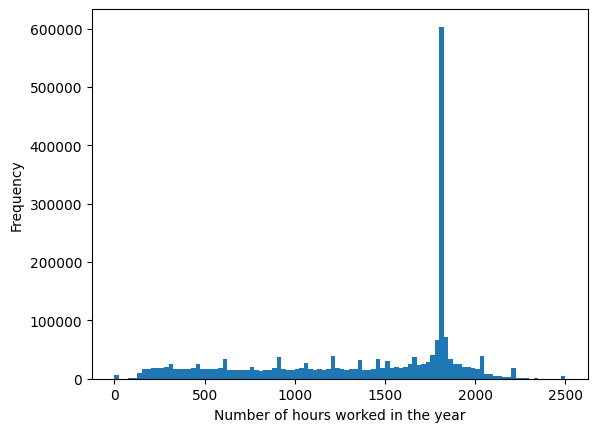

In [26]:
fig, ax = plt.subplots()
ax.hist(base['NBHEUR'], bins=100, cumulative=False, log=False)
ax.set_xlabel('Number of hours worked in the year')
ax.set_ylabel('Frequency')
plt.show()

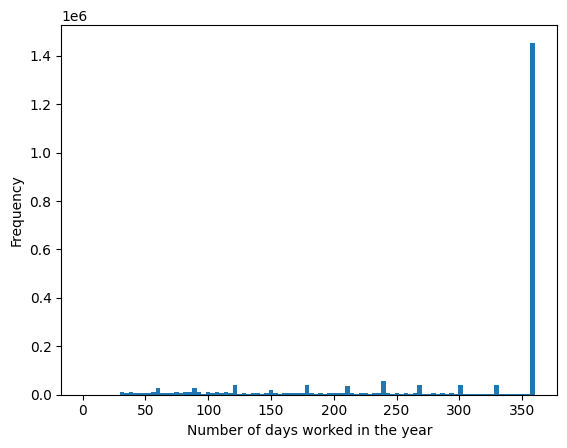

In [27]:
fig, ax = plt.subplots()
ax.hist(base['DUREE'], bins=100, cumulative=False, log=False)
ax.set_xlabel('Number of days worked in the year')
ax.set_ylabel('Frequency')
plt.show()

In [28]:
# Creating dummy varaibles indicating that the worker worked more than 35h a week
base["top_extra_hour_tot"] = (base["NBHEUR"] > 1820).astype(int)
base["top_extra_hour_tot_sup35"] = (base["NBHEUR"] > 1855).astype(int)
base.groupby(["top_extra_hour_tot", "top_extra_hour_tot_sup35"]).size()


top_extra_hour_tot  top_extra_hour_tot_sup35
0                   0                           2040215
1                   0                            115389
                    1                            248171
dtype: int64

In [29]:
base.groupby(["top_extra_hour_tot", "top_extra_hour_tot_sup35"]).size()


top_extra_hour_tot  top_extra_hour_tot_sup35
0                   0                           2040215
1                   0                            115389
                    1                            248171
dtype: int64

In [30]:
# Correlation between the duration of the contract and the number of hours worked
model = sm.ols('NBHEUR ~ DUREE', data=base).fit()
print(model.summary())

# Is a bit below 5, which would have been the expected number for full-time job (7h a day * 5/7 working day in a week)


                            OLS Regression Results                            
Dep. Variable:                 NBHEUR   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                 5.510e+06
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:53:32   Log-Likelihood:            -1.6569e+07
No. Observations:             2315888   AIC:                         3.314e+07
Df Residuals:                 2315886   BIC:                         3.314e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.0958      0.627    -25.664      0.0

In [ ]:
# Logistic regression of top_extra_hour_tot on DUREE
start = time.time()
model_logit = sm.logit('top_extra_hour_tot ~ SEXE + TYP_EMPLOI + AGE + CONT_TRAV + CS_N + DEPT_N + DOMEMPL_N + A38', data=base[base["DUREE"] == 360]).fit()
print(time.time() - start)
print(model_logit.summary())


In [ ]:
# Include the explanatory variables in a base for regression
base["CS_cat"] = base["CS"].astype("")
reg_base = pd.get_dummies(base[["TYP_EMPLOI", "DEPT", "CONT_TRAV", "CS", "A38"]], drop_first=False)
reg_base = reg_base.drop(["TYP_EMPLOI_A", "DEPT_91", "CONT_TRAV_CDI", "CS_45", "A38_CG"], axis = 1)
reg_base = statsmodels.tools.tools.add_constant(reg_base)
reg_base['AGE'] = base['AGE']
reg_base['AGE_SQ'] = base['AGE']**2
reg_base['SEXE'] = base['SEXE']

#Include the outcome variable
reg_base['top_extra_hour_tot'] = base['top_extra_hour_tot']

#Include the filter variable, to focus on the relevant subsample
reg_base['DUREE'] = base['DUREE']
reg_base = reg_base[reg_base["DUREE"] == 360]
reg_base = reg_base.drop("DUREE", axis = 1)


reg_base.head(1)

In [ ]:
reg_base.head(1)

In [ ]:
# Fit the logistic regression model
start = time.time()
formula = "top_extra_hour_tot ~ " + "+".join([col for col in reg_base.columns if col != 'top_extra_hour_tot'])
model = sm.logit(formula, data=reg_base).fit()
print(time.time() - start)
print(model.summary())



In [ ]:
X = pd.get_dummies(base[["TYP_EMPLOI", "DEPT_N", "CONT_TRAV", "CS_N"]], drop_first=False)  # drop_first to avoid collinearity
X = statsmodels.tools.tools.add_constant(X)  # Adds an intercept to the model

In [ ]:
X.head(1)


# TEsts of LASSOs